In [1]:
import numpy as np
import matplotlib.pyplot as plt
from get_train_test_data1 import *
from get_train_test_data_2 import *

from svm import *

## Read and load data

In [2]:
data_all_orig = GetNeutralvsExpData()
# Generate labels:
all_labels = np.empty((data_all_orig.shape[0]*data_all_orig.shape[1],))
# Set neutral = 1, expression = -1
all_labels[::2] = 1
all_labels[1::2] = -1

data_all = GetTrainTestSplit(data_all_orig,100) #,True,1)

---------- Data
(24, 21, 600)
(600, 24, 21)
Data shape with neutral and Exp data:  (200, 2, 504)
Test Labels: 
1.0 -1.0 1.0 -1.0 1.0 -1.0 1.0


In [3]:
print('Shapes')
print(' Train x\t',data_all[0].shape)
print(' Train y\t',data_all[1].shape)
print(' Test x\t',data_all[2].shape)
print(' Test y\t',data_all[3].shape)

Shapes
 Train x	 (300, 504)
 Train y	 (300,)
 Test x	 (100, 504)
 Test y	 (100,)


In [4]:
from pca import *

In [5]:
cross_validation_arr = [0.1, 0.5, 0.6, 0.9, 1, 1.5, 2, 2.5, 3, 4.1, 5, 6, 7]
num_comp = 132
#cross_validation_arr = [0.1,0.3,0.4,0.5,0.6,0.7,0.9,1,2,3,4,5]
classifier = SVM('linear', cross_validation_arr, 0.001, 6)
train_x =  data_all[0]
train_y = data_all[1]
test_x =  data_all[2]
test_y =  data_all[3]
pca = PCA(num_comp)
pca.fit(train_x)
train_x_dash = pca.transform(train_x)


data_all_dash = data_all_orig.reshape(data_all_orig.shape[0]*data_all_orig.shape[1] , data_all_orig.shape[2])
pca = PCA(num_comp)
pca.fit(data_all_dash)
data_all_dash = pca.transform(data_all_dash)

pca = PCA(num_comp)
pca.fit(test_x)
test_x_dash = pca.transform(test_x)
pass


In [6]:
train_x.shape

(300, 504)

In [7]:
train_acc,test_acc,error_vec = classifier.classify_adaboost(train_x_dash,test_x_dash,all_labels,train_y,test_y,data_all_dash,10,25)

----------
Adaboost Iteration  1
----------
Adaboost Iteration  2
     pcost       dcost       gap    pres   dres
 0: -1.5601e-01 -2.8309e+01  1e+02  1e+00  8e-11
 1:  1.7987e-01 -1.0217e+01  1e+01  4e-02  2e-11
 2: -2.8336e-01 -1.0594e+00  8e-01  1e-03  4e-11
 3: -3.8862e-01 -4.4281e-01  5e-02  4e-06  2e-11
 4: -3.9467e-01 -3.9692e-01  2e-03  1e-07  3e-12
 5: -3.9508e-01 -3.9516e-01  8e-05  1e-09  5e-13
 6: -3.9510e-01 -3.9510e-01  1e-06  1e-09  7e-14
 7: -3.9510e-01 -3.9510e-01  1e-08  1e-09  1e-14
Optimal solution found.
----------
Adaboost Iteration  3
     pcost       dcost       gap    pres   dres
 0: -1.5601e-01 -2.8309e+01  1e+02  1e+00  8e-11
 1:  1.7987e-01 -1.0217e+01  1e+01  4e-02  2e-11
 2: -2.8336e-01 -1.0594e+00  8e-01  1e-03  4e-11
 3: -3.8862e-01 -4.4281e-01  5e-02  4e-06  2e-11
 4: -3.9467e-01 -3.9692e-01  2e-03  1e-07  3e-12
 5: -3.9508e-01 -3.9516e-01  8e-05  1e-09  5e-13
 6: -3.9510e-01 -3.9510e-01  1e-06  1e-09  7e-14
 7: -3.9510e-01 -3.9510e-01  1e-08  1e-09  1e-

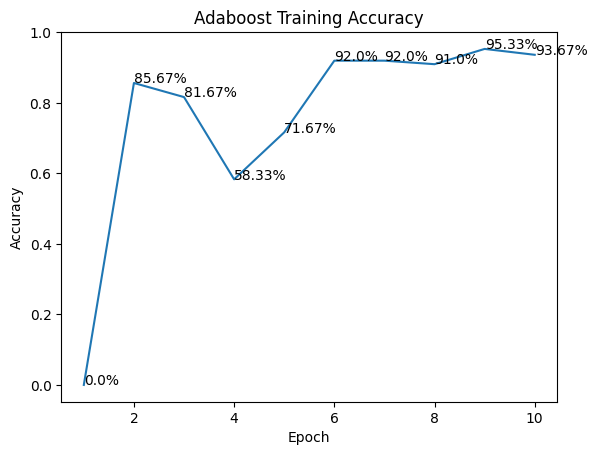

In [8]:
epoch = np.arange(1,11,1)

plt.figure()
plt.title('Adaboost Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(epoch,train_acc)
for a,b in zip(epoch, train_acc): 
    plt.text(a, b, str(round(b*100,2))+'%')
plt.savefig("adabosttrainacc.png")

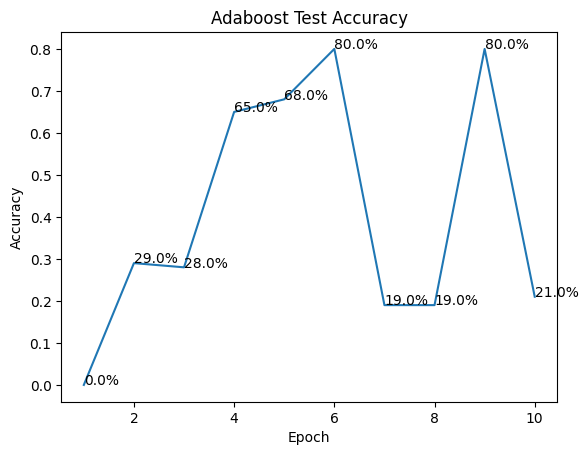

In [9]:

plt.figure()
plt.title('Adaboost Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(epoch,test_acc)
for a,b in zip(epoch, test_acc): 
    plt.text(a, b, str(round(b*100,2))+'%')
plt.savefig("adabosttestacc.png")